In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # Accuracy metrics
from sklearn.metrics import precision_score  # Precision metrics
from sklearn.metrics import recall_score  # Recall metrics
from sklearn.metrics import f1_score  # F1 metrics
from sklearn.metrics import confusion_matrix  # Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay  # Confusion matrix display
from sklearn.metrics import mean_absolute_error  # Mean absolute error
from sklearn.metrics import mean_squared_error  # Mean squared error
from sklearn.metrics import classification_report  # Classification report


In [2]:
# Reading File CSV
df = pd.read_csv('output.csv')


In [3]:
# Splitting Data into Class and Value
X = df.drop('class', axis=1)  # Class
y = df['class']  # Value


In [4]:
# Test Size Value
size = [0.1, 0.15, 0.2, 0.25, 0.3, 0.33, 0.35, 0.4, 0.45, 0.5]


(5788,)
rf0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1779
           1       1.00      1.00      1.00      1982
           2       1.00      1.00      1.00      2027

    accuracy                           1.00      5788
   macro avg       1.00      1.00      1.00      5788
weighted avg       1.00      1.00      1.00      5788

0.9998272287491361
0.9998356344510192
0.9998318197107299
0.9998336855950423
0.00017277125086385625
0.00017277125086385625
0.013144247824195049
(8681,)
rf0.15
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2667
           1       1.00      1.00      1.00      2983
           2       1.00      1.00      1.00      3031

    accuracy                           1.00      8681
   macro avg       1.00      1.00      1.00      8681
weighted avg       1.00      1.00      1.00      8681

1.0
1.0
1.0
1.0
0.0
0.0
0.0
(11575,)
rf0.2
              precision

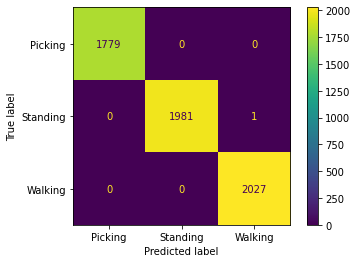

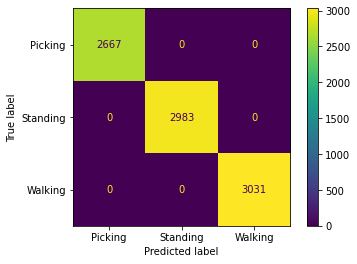

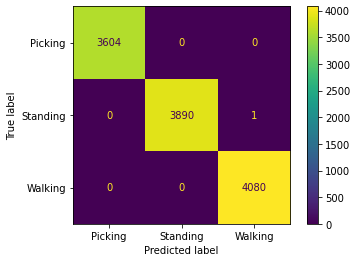

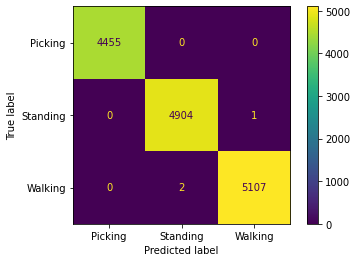

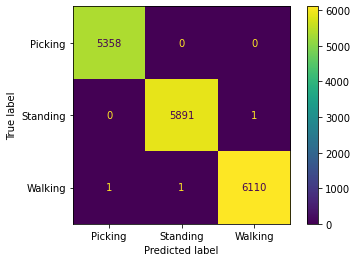

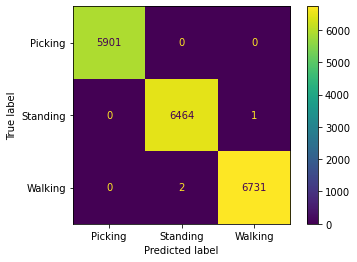

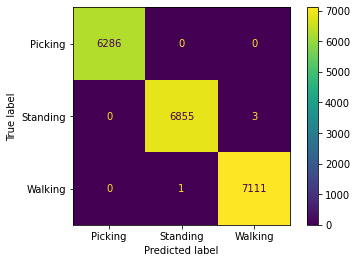

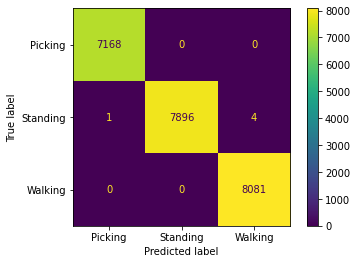

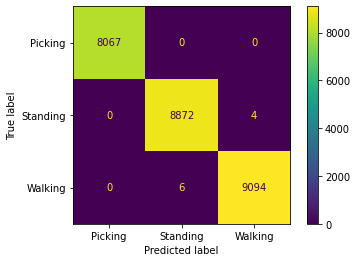

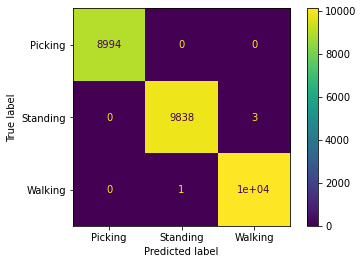

In [5]:
for i in size:
    # Splitting Data into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=i, random_state=1234)  # 1234

    # Test Size Shape Value
    print(y_test.shape)

    # Pipeline for Test Size
    pipelines = {'rf' + str(i): make_pipeline(StandardScaler(),
                                              RandomForestClassifier(random_state=42))}

    # Training Pipeline
    fit_models = {}
    for algo, pipeline in pipelines.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model
        for algo, model in fit_models.items():
            yhat = model.predict(X_test)

            # Change Class to New Value Picking [0], Standing [1], Walking [2]
            ytest = pd.factorize(y_test)[0]
            ypred = pd.factorize(yhat)[0]

            print(algo)

            # Confusion Matrix Display
            cm = confusion_matrix(y_test, yhat, labels=model.classes_)
            disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

            # Classification Report
            print(classification_report(ytest, ypred))

            # Accuracy
            print(accuracy_score(y_test, yhat))

            # Precision
            print(precision_score(y_test, yhat, average='macro'))

            # Recall
            print(recall_score(y_test, yhat, average='macro'))

            # F1 Score
            print(f1_score(y_test, yhat, average='macro'))

            # Mean Absolute Error
            print(mean_absolute_error(ytest, ypred))

            # Mean Squared Error
            print(mean_squared_error(ytest, ypred))

            # Root Mean Squared Error
            print(np.sqrt(mean_squared_error(ytest, ypred)))
            disp.plot()
